# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *

2024-04-17 16:23:10.783215: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 16:23:10.783277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 16:23:10.784852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Read Dataset

In [2]:
df = pd.read_csv('/kaggle/input/tsla-data/tsla.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


# split Dataset into train & test

In [5]:
# train --> 80%
# test --> 20%

train_size = int(len(df) * 0.80) # 1486

In [6]:
train = df[0: train_size]
len(train)

1486

In [7]:
data_length = len(df)
data_length

1858

In [8]:
test = df[train_size:data_length]
len(test)

372

In [9]:
train.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [10]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


# Data Preprcessing

In [11]:
scaler = MinMaxScaler()
train = train.loc[:, ['Open']].values

In [12]:
test_array = test.loc[:, ['Open']].values

In [13]:
test_array

array([[216.6  ],
       [217.91 ],
       [220.5  ],
       [224.99 ],
       [223.04 ],
       [221.48 ],
       [219.59 ],
       [220.   ],
       [218.   ],
       [222.24 ],
       [233.8  ],
       [234.98 ],
       [227.39 ],
       [219.5  ],
       [218.88 ],
       [216.95 ],
       [217.42 ],
       [217.81 ],
       [219.5  ],
       [220.68 ],
       [199.47 ],
       [195.69 ],
       [190.05 ],
       [190.86 ],
       [201.89 ],
       [205.13 ],
       [212.97 ],
       [206.14 ],
       [209.73 ],
       [210.   ],
       [213.1  ],
       [217.8  ],
       [219.96 ],
       [224.1  ],
       [225.5  ],
       [223.12 ],
       [222.52 ],
       [219.64 ],
       [225.   ],
       [226.47 ],
       [226.   ],
       [221.99 ],
       [222.27 ],
       [227.69 ],
       [229.34 ],
       [227.95 ],
       [230.7  ],
       [235.5  ],
       [229.37 ],
       [227.37 ],
       [225.69 ],
       [230.   ],
       [228.   ],
       [226.82 ],
       [228.24 ],
       [22

In [14]:
train_scaled = scaler.fit_transform(train)

In [15]:
train_scaled

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [16]:
length = len(train_scaled)
length

1486

In [17]:
time_step = 40
x_train = []
y_train = []

for i in range(time_step, length):
    x_train.append(train_scaled[i - time_step:i, 0])
    y_train.append(train_scaled[i,0])

In [18]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [19]:
x_train.shape

(1446, 40)

In [20]:
y_train.shape

(1446,)

In [21]:
x_train = np.reshape(x_train,( x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1446, 40, 1)

# RNN Model

In [22]:
rnn_model = Sequential()

#add simple rnn layer with tanh activation function, with input shape
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True, 
                       input_shape = (x_train.shape[1], 1)))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add simple rnn layer with tanh activation function
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add simple rnn layer with tanh activation function
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add simple rnn layer 
rnn_model.add(SimpleRNN(50))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add dense layer--> output
rnn_model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile & Fit RNN Model

In [23]:
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
rnn_model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
 6/46 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.1453

I0000 00:00:1713371032.571184     356 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - loss: 0.6007
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2087
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1312
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0900
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0704
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0606
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0453
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0374
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0347
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0298
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0251
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0230
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0228
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0199
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0192
Epoch 16/20
4

# Model Testing

In [25]:
total_data =pd.concat((df['Open'], test['Open']), axis = 0)
total_data.head()

0    17.00
1    19.00
2    25.79
3    25.00
4    23.00
Name: Open, dtype: float64

In [26]:
 len(total_data)

2230

In [27]:
inputs = total_data[len(total_data)- len(test) - time_step: ].values.reshape(-1,1)
inputs

array([[380.25 ],
       [380.   ],
       [373.   ],
       [374.9  ],
       [366.49 ],
       [353.15 ],
       [350.93 ],
       [349.9  ],
       [339.88 ],
       [341.86 ],
       [342.52 ],
       [335.9  ],
       [351.25 ],
       [356.   ],
       [353.1  ],
       [349.65 ],
       [346.8  ],
       [353.89 ],
       [352.95 ],
       [356.98 ],
       [353.76 ],
       [350.91 ],
       [355.97 ],
       [355.56 ],
       [352.69 ],
       [349.88 ],
       [338.8  ],
       [336.7  ],
       [327.78 ],
       [319.75 ],
       [319.18 ],
       [320.23 ],
       [332.25 ],
       [300.13 ],
       [299.5  ],
       [307.   ],
       [301.02 ],
       [305.5  ],
       [302.5  ],
       [302.5  ],
       [216.6  ],
       [217.91 ],
       [220.5  ],
       [224.99 ],
       [223.04 ],
       [221.48 ],
       [219.59 ],
       [220.   ],
       [218.   ],
       [222.24 ],
       [233.8  ],
       [234.98 ],
       [227.39 ],
       [219.5  ],
       [218.88 ],
       [21

In [28]:
inputs = scaler.transform(inputs)
inputs

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [29]:
inputs.shape

(412, 1)

In [30]:
x_test = []
for i in range(time_step, 412):
    x_test.append(inputs[i - time_step:i - 0])

In [31]:
x_test = np.array(x_test)

In [32]:
x_test.shape

(372, 40, 1)

In [33]:
y_pred = rnn_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step


In [34]:
y_pred

array([[0.9868252 ],
       [0.9402577 ],
       [0.8927666 ],
       [0.8568945 ],
       [0.8173846 ],
       [0.7961673 ],
       [0.7817806 ],
       [0.7660529 ],
       [0.74966425],
       [0.7384075 ],
       [0.76685387],
       [0.7692562 ],
       [0.8019817 ],
       [0.80762535],
       [0.8158803 ],
       [0.80575967],
       [0.8048553 ],
       [0.7826646 ],
       [0.7748098 ],
       [0.7624699 ],
       [0.75533265],
       [0.7458167 ],
       [0.7187184 ],
       [0.72011995],
       [0.7041707 ],
       [0.70482504],
       [0.7055193 ],
       [0.7154434 ],
       [0.71456194],
       [0.72421813],
       [0.7317538 ],
       [0.732005  ],
       [0.7508897 ],
       [0.7519622 ],
       [0.7648019 ],
       [0.7795301 ],
       [0.7971321 ],
       [0.792439  ],
       [0.786348  ],
       [0.79503375],
       [0.80081654],
       [0.8026552 ],
       [0.80039907],
       [0.8051289 ],
       [0.8049805 ],
       [0.8077513 ],
       [0.80929273],
       [0.814

In [35]:
y_pred = scaler.inverse_transform(y_pred)
y_pred

array([[284.09265],
       [271.44818],
       [258.55292],
       [248.81256],
       [238.08444],
       [232.32332],
       [228.4169 ],
       [224.14635],
       [219.69633],
       [216.63979],
       [224.36383],
       [225.01613],
       [233.9021 ],
       [235.43452],
       [237.67598],
       [234.92793],
       [234.68236],
       [228.65692],
       [226.52411],
       [223.17346],
       [221.23547],
       [218.65161],
       [211.29361],
       [211.67418],
       [207.34348],
       [207.52115],
       [207.70967],
       [210.40434],
       [210.16501],
       [212.78696],
       [214.83313],
       [214.90132],
       [220.0291 ],
       [220.3203 ],
       [223.80667],
       [227.80582],
       [232.58528],
       [231.31096],
       [229.65707],
       [232.01552],
       [233.58572],
       [234.08498],
       [233.47237],
       [234.75665],
       [234.71637],
       [235.46872],
       [235.88727],
       [237.34828],
       [238.82022],
       [238.2318 ],


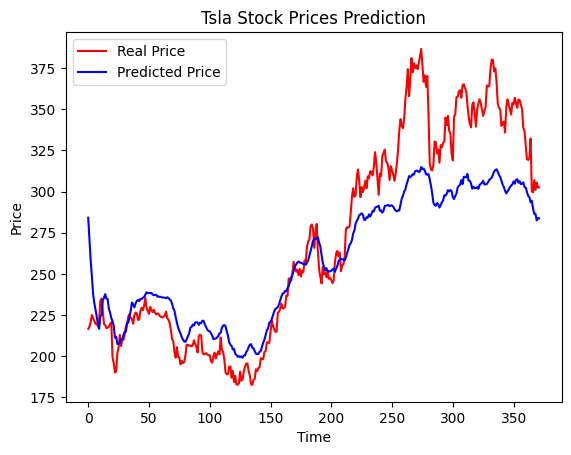

In [36]:
plt.plot(test_array, color = 'red', label = 'Real Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.title("Tsla Stock Prices Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# LSTM Model 

In [43]:
lstm_model = Sequential()

#add simple lstm layer with tanh activation function, with input shape
lstm_model.add(LSTM(50, activation = 'tanh', return_sequences = True, 
                       input_shape = (x_train.shape[1], 1)))
#add dropout layer
lstm_model.add(Dropout(0.2))

#add simple lstm layer with tanh activation function
lstm_model.add(LSTM(50,  return_sequences = True))
#add dropout layer
lstm_model.add(Dropout(0.2))

#add simple lstm layer with tanh activation function
lstm_model.add(LSTM(50, return_sequences = True))
#add dropout layer
lstm_model.add(Dropout(0.2))

#add simple lsym layer 
lstm_model.add(LSTM(50))
#add dropout layer
lstm_model.add(Dropout(0.2))

#add dense layer--> output
lstm_model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(x_train, y_train , epochs = 20)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0706
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0078
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0050
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0053
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0043
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0056
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0038
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0040
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036
Epoc

In [45]:
lstm_pred = lstm_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [46]:
lstm_pred = scaler.inverse_transform(lstm_pred)
lstm_pred

array([[280.6859 ],
       [277.67877],
       [273.42877],
       [267.66595],
       [260.57196],
       [252.57358],
       [244.19528],
       [235.9482 ],
       [228.30188],
       [221.61311],
       [216.15892],
       [212.23662],
       [210.0145 ],
       [209.37521],
       [209.97995],
       [211.4114 ],
       [213.24747],
       [215.1503 ],
       [216.88321],
       [218.34262],
       [219.501  ],
       [220.13292],
       [220.02782],
       [219.03233],
       [217.16022],
       [214.67358],
       [211.9307 ],
       [209.36145],
       [207.21303],
       [205.6645 ],
       [204.7837 ],
       [204.57898],
       [205.04736],
       [206.14029],
       [207.84193],
       [210.02686],
       [212.51978],
       [215.12988],
       [217.61763],
       [219.86658],
       [221.82008],
       [223.51115],
       [224.80617],
       [225.68486],
       [226.22446],
       [226.54413],
       [226.72789],
       [226.8683 ],
       [227.08578],
       [227.38608],


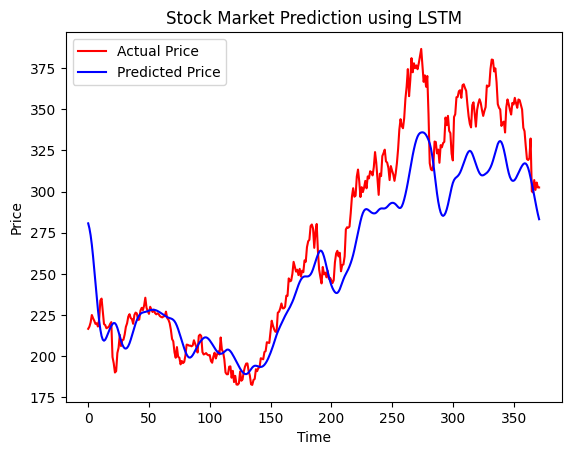

In [47]:
plt.plot(test_array, color = 'red', label = 'Actual Price')
plt.plot(lstm_pred, color = 'blue', label = 'Predicted Price')
plt.title("Stock Market Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

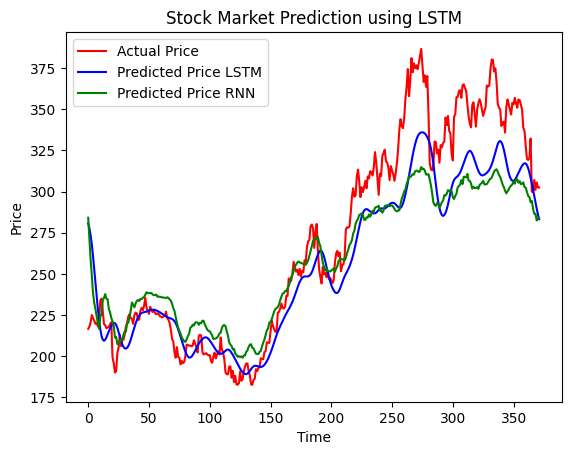

In [48]:
plt.plot(test_array, color = 'red', label = 'Actual Price')
plt.plot(lstm_pred, color = 'blue', label = 'Predicted Price LSTM')
plt.plot(y_pred, color = 'green', label = 'Predicted Price RNN')
plt.title("Stock Market Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()